In [15]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import quandl
import cvxportfolio as cp

In [2]:
# Get problem data
tickers = ['AMZN', 'GOOGL', 'MAC', 'NKE']
start_date='2012-01-01'
end_date='2016-12-31'
returns = pd.DataFrame(dict([(ticker, quandl.get('WIKI/'+ticker, 
                                    start_date=start_date, 
                                    end_date=end_date)['Adj. Close'].pct_change())
                for ticker in tickers]))
returns[["USDOLLAR"]]=quandl.get('FRED/DTB3', start_date=start_date, end_date=end_date)/250
returns = returns.fillna(method='ffill').iloc[1:]

In [5]:
spread=pd.DataFrame(index=returns.index, columns=returns.columns[:-1], data=10E-4) ##TODO
tcost_model=cp.TcostModel(spread=spread, nonlin_term=False)
borrow_costs=pd.DataFrame(index=returns.index, columns=returns.columns[:-1], data=1E-4) ##TODO
hcost_model=cp.HcostModel(borrow_costs=borrow_costs)

#estimates
r_hat = pd.rolling_mean(returns, window=250, min_periods=250).iloc[250:]
Sigma_hat = pd.rolling_cov(returns, window=250, min_periods=250).iloc[250:]

/Users/enzo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:7: FutureWarning: pd.rolling_mean is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(window=250,min_periods=250,center=False).mean()
/Users/enzo/anaconda3/lib/python3.5/site-packages/ipykernel/__main__.py:8: FutureWarning: pd.rolling_cov is deprecated for DataFrame and will be removed in a future version, replace with 
	DataFrame.rolling(min_periods=250,window=250).cov(pairwise=True,other=<DataFrame>)


In [34]:
#### Set up optimization
alpha_source = cp.AlphaSource(r_hat)
risk = cp.FullSigma(Sigma_hat)
gamma_risk = 5.
gamma_trade = 1.
gamma_hold = 1.
leverage_limit = cp.LeverageLimit(3)
spo_policy = cp.SinglePeriodOpt(alpha_source, [gamma_risk*risk,
                                            gamma_trade*tcost_model,
                                            gamma_hold*hcost_model],
                                            [leverage_limit])

#### Run backtest
market_sim=cp.MarketSimulator(returns, [tcost_model, hcost_model], cash_key='USDOLLAR')
init_portfolio = pd.Series(index=returns.columns, data=0.)
init_portfolio.USDOLLAR = 100
result=market_sim.run_backtest(init_portfolio,
                                 start_time='2013-01-03', 
                                 end_time='2016-12-31',  
                                 policy=spo_policy)

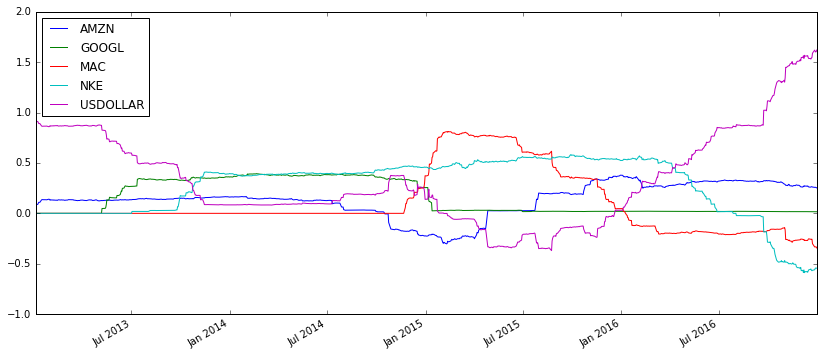

In [35]:
result.w.plot(figsize=(14,6))

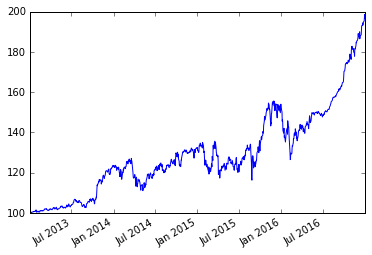

In [36]:
result.v.plot()

In [57]:
summary=pd.DataFrame()
summary.loc[:,r'R^\text{p}'] = .1

ValueError: cannot set a frame with no defined index and a scalar

In [ ]:
su

In [50]:
pd.DataFrame()

In [39]:
result.excess_returns.mean()*100*250

6.811052507751611

In [38]:
result.excess_returns.std()*100*np.sqrt(250),

(17.133427401199839,)

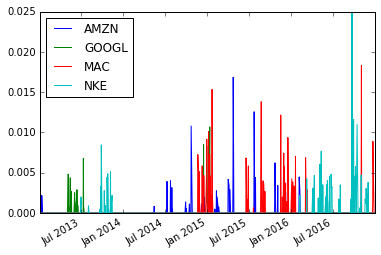

In [41]:
result.simulator_TcostModel.plot()

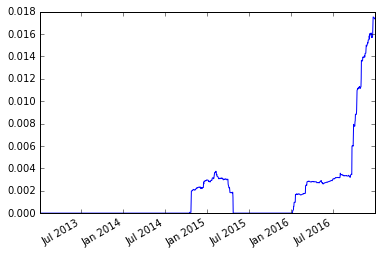

In [42]:
result.simulator_HcostModel.plot()

In [49]:
result.turnover.mean()*250

1.2983198620837462

In [47]:
result.turnover?

In [22]:
result.excess_returns.mean()*100*250

-4.167025900063374e-06

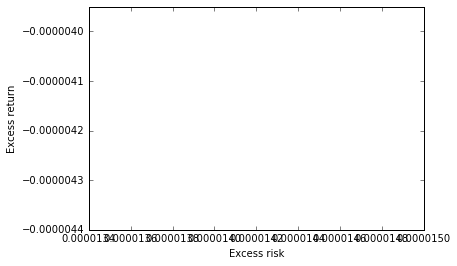

In [20]:
plt.plot(result.excess_returns.std()*100*np.sqrt(250),
         result.excess_returns.mean()*100*250)
plt.xlabel('Excess risk')
plt.ylabel('Excess return')